# **Visual Information Processing Lab**

# LeNet

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
import os
os.chdir('/content/drive/My Drive/M_2nd/DL/class_tutorial_google_collab/Digit Recognisation/')
os.getcwd()

'/content/drive/My Drive/M_2nd/DL/class_tutorial_google_collab/Digit Recognisation'

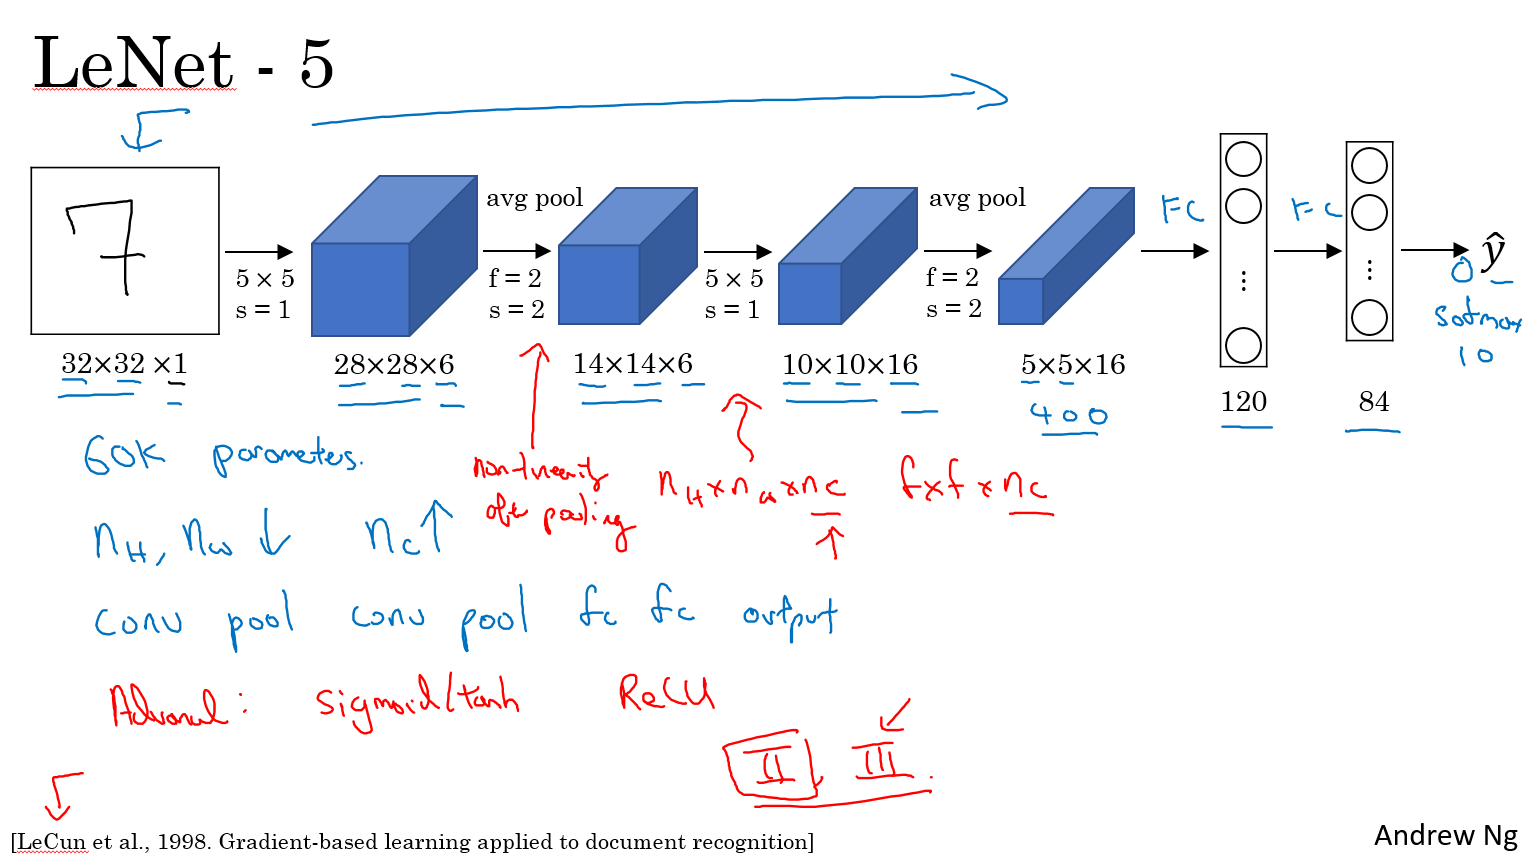

In [9]:
from IPython.display import Image, display
display(Image(filename="/content/drive/My Drive/M_2nd/DL/class_tutorial_google_collab/Digit Recognisation/lenet.png"))

### Datasets and Pre Processing

In [10]:
import keras
from keras.datasets import mnist
#mnist dataset

In [13]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [14]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
3
uint8
3
uint8
3
uint8


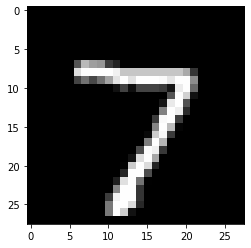

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='gray')

In [16]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

60000
28
28


In [17]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')
# data-type to which the array is cast

In [18]:
#keras.utils.normalize(a, axis=-1, order=2)
# pass xtrain or xtest inplace of a will normalise using keras..
import numpy as np


print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
33.318447
78.567444
2.8215446 2.8215446
-0.42407447 -0.42407447


In [19]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
print(xtrain.shape)
xtest =  xtest.reshape(xtest.shape[0],28,28,1)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### LeNet Model

In [23]:
from tensorflow import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

https://keras.io/layers/convolutional/


In [25]:
model = models.Sequential() #building sequential model
# Con2D(no_of_filter,(input size))
#only in first layer necessary to pass input shape 
model.add(layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
# max pool, avg pool , global pooling
model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu')) # no of neurons in the layer
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))
#classification layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

### Visualization of randomly initialized filters

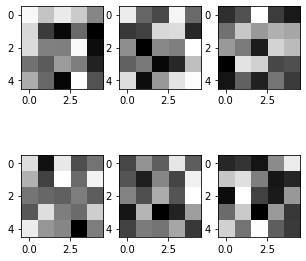

In [26]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [27]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[ 0.17235105  0.09988014  0.15288429  0.11081271  0.01641916]
 [ 0.1289322  -0.08520296 -0.15499543 -0.02347046 -0.16696222]
 [ 0.13328679  0.00837244  0.00691839  0.17401151 -0.1491867 ]
 [-0.0109679  -0.04226458  0.0458381   0.00570148 -0.11980432]
 [ 0.06817017 -0.02463576 -0.15968043  0.18273275 -0.05323313]]

[[ 0.13006683 -0.04379345 -0.07905361  0.14133741 -0.03992167]
 [-0.10374063 -0.09019169  0.10290961  0.10869382 -0.12443338]
 [ 0.00809357 -0.17538932 -0.00088726 -0.01110648  0.15474547]
 [-0.04878373 -0.01939142 -0.16624051 -0.12440196  0.07131328]
 [ 0.11026905 -0.15758276  0.02132283  0.11839317  0.15182544]]

[[-0.11949378 -0.07338877  0.15892981 -0.10078368 -0.14951079]
 [-0.03142677  0.08406605  0.02224804  0.0529604   0.03972919]
 [ 0.0215681  -0.01850805 -0.1452227   0.10132419  0.06786011]
 [-0.18310374  0.12058778  0.09710236 -0.08721966 -0.07665985]
 [-0.15625955 -0.05273335 -0.13856174 -0.02638908 -0.10324164]]

[[ 0.13274999 -0.15205283  0.1480804  -0.06641172

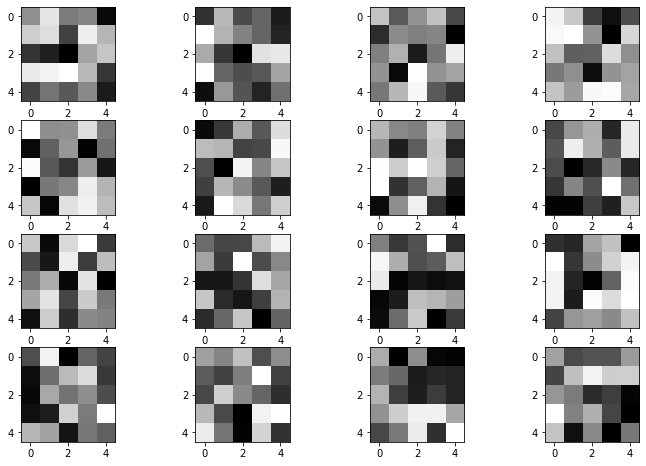

In [28]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [29]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.01459581  0.08031288 -0.00042321  0.00721548 -0.08739407]
 [ 0.06243911  0.0741128  -0.04404612  0.0870522   0.04301648]
 [-0.05474452 -0.06944244 -0.09407695  0.02937329  0.05499057]
 [ 0.08341117  0.09004414  0.09957695  0.04513516 -0.05305288]
 [-0.04276658 -0.00567801 -0.02728336  0.00967528 -0.07313444]]

[[-0.06477525  0.0377679  -0.04534372 -0.02661997 -0.08131482]
 [ 0.0923287   0.03378311 -0.0038005  -0.02596749 -0.0759505 ]
 [ 0.02678552 -0.06093277 -0.10304411  0.06922103  0.07425714]
 [ 0.09021136 -0.02567153 -0.04425714 -0.03549375  0.02317719]
 [-0.09224296  0.01311768 -0.03828768 -0.07616125 -0.01738524]]

[[ 0.05892622 -0.01520474  0.02473855  0.05796963 -0.02808095]
 [-0.04628862  0.01941921  0.01134942  0.01560083 -0.07857343]
 [ 0.01105178  0.04650265 -0.05897772  0.00406262  0.08938473]
 [ 0.02508332 -0.07234183  0.1014767   0.02527659  0.03662436]
 [ 0.00521906  0.05041832  0.0959048  -0.01578874 -0.03929372]]

[[ 0.07859151  0.04730184 -0.05344586 -0.08637401

In [30]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	# after 10 epoch will drop by 50%(learning rate) 
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

### Compile and Training the model

https://keras.io/callbacks/#callback

In [32]:
os.chdir('/content/drive/My Drive/M_2nd/DL/class_tutorial_google_collab/Digit Recognisation/')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
# want min validation loss model.
mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

filepath = "saved-model-{epoch:02d}.h5"

#mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)

cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

#rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.00)

#es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=1000, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
# if model not improving for 1000 echop stop then ...

/content/drive/My Drive/M_2nd/DL/class_tutorial_google_collab/Digit Recognisation


In [33]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=50, verbose=1)

Epoch 1/50
188/188 [==============================] - ETA: 0s - loss: 1.9513 - accuracy: 0.3595
Epoch 00001: val_loss improved from inf to 0.96694, saving model to CNN_MNIST.h5
188/188 [==============================] - 1s 7ms/step - loss: 1.9513 - accuracy: 0.3595 - val_loss: 0.9669 - val_accuracy: 0.7251
Epoch 2/50
179/188 [===========================>..] - ETA: 0s - loss: 0.6145 - accuracy: 0.8147
Epoch 00002: val_loss improved from 0.96694 to 0.45234, saving model to CNN_MNIST.h5
188/188 [==============================] - 1s 5ms/step - loss: 0.6075 - accuracy: 0.8169 - val_loss: 0.4523 - val_accuracy: 0.8573
Epoch 3/50
186/188 [============================>.] - ETA: 0s - loss: 0.4126 - accuracy: 0.8774
Epoch 00003: val_loss improved from 0.45234 to 0.35649, saving model to CNN_MNIST.h5
188/188 [==============================] - 1s 4ms/step - loss: 0.4123 - accuracy: 0.8775 - val_loss: 0.3565 - val_accuracy: 0.8943
Epoch 4/50
179/188 [===========================>..] - ETA: 0s - loss

### Evaluate

In [34]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9778


[0.07116799056529999, 0.9778000116348267]

### Prediction

In [35]:
pred=model.predict(xtest[0].reshape(1,28,28,1))
print(pred)
print(pred.argmax())

[[8.6123973e-06 1.8580058e-06 4.4616347e-05 2.1810764e-03 3.6389385e-09
  1.9387922e-08 1.6875856e-10 9.9775946e-01 5.3656407e-07 3.9099414e-06]]
7


In [36]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9778
0.07116799056529999
0.9778000116348267


### Loss and Accuracy Curves

In [39]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

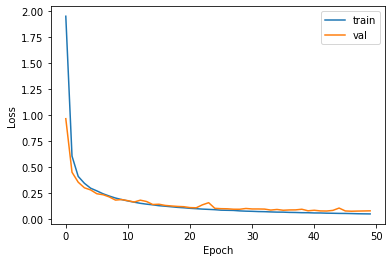

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

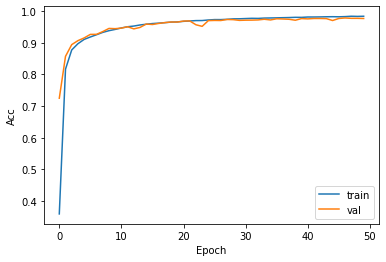

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [42]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 28, 28, 1))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] Predicted is 7
2 Actual is  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] Predicted is 2
3 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
4 Actual is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 0
5 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
6 Actual is  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] Predicted is 1
7 Actual is  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] Predicted is 4
8 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9
9 Actual is  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] Predicted is 5
10 Actual is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] Predicted is 9


In [43]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98       980
     class 1       0.99      1.00      0.99      1135
     class 2       0.99      0.96      0.98      1032
     class 3       0.95      0.99      0.97      1010
     class 4       0.98      0.98      0.98       982
     class 5       0.98      0.98      0.98       892
     class 6       0.99      0.98      0.99       958
     class 7       0.98      0.97      0.97      1028
     class 8       0.98      0.96      0.97       974
     class 9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 972    0    1    0    1    1    1    1    2    1]
 [   0 1131    0    1    0    0    1    1    1    0]
 [   8    4  995   12    1    0    0    7    5    0]
 [   0    0    0  997    1    3    0    3    3    3]
 [   1    0    1    1  965    0    1    1    1   11]
 [   3    0    0   12    0  870    2    1    2    2]
 [   5    2    1    2    3    4  938    0    3    0]
 [   0    5    4    3    2    1    0  997    2   14]
 [   4    0    2   16    5    5    0    2  933    7]
 [   6    2    0    7    5    1    0    7    1  980]]


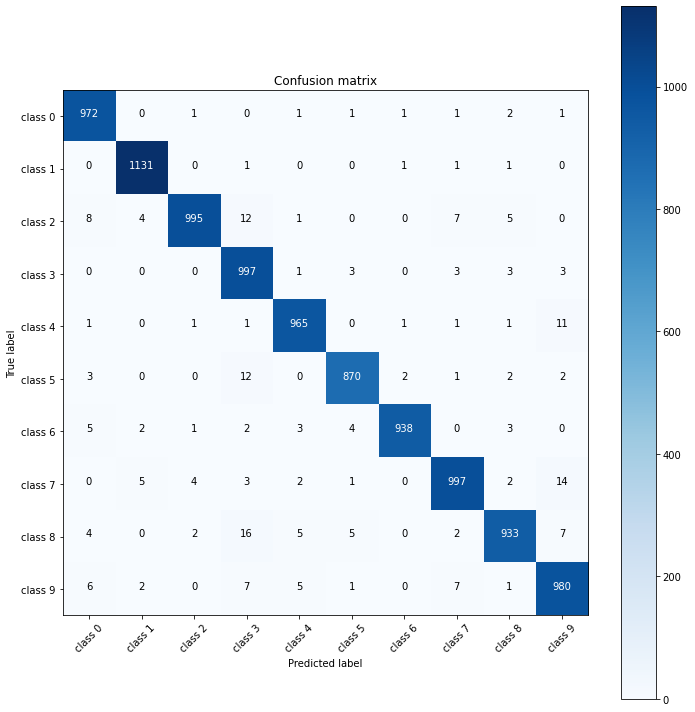

In [46]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))    # error matrix .
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [47]:
for layer in model.layers:
  print(layer)

In [48]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,28,28,1))

In [49]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [50]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

(1, 24, 24, 6)
(1, 12, 12, 6)
(1, 8, 8, 16)
(1, 4, 4, 16)
(1, 256)
(1, 120)
(1, 84)
(1, 10)


(1, 24, 24, 6)


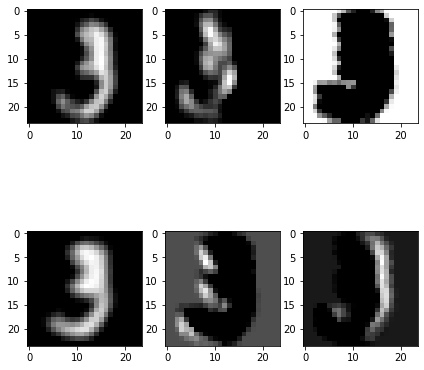

In [51]:
print(activations[0].shape)
display_activation(activations,3,2,0)

(1, 12, 12, 6)


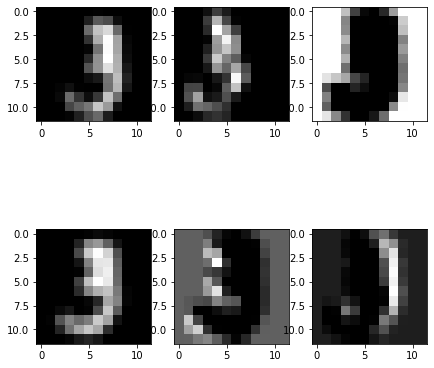

In [52]:
print(activations[1].shape)
display_activation(activations,3,2,1)

(1, 8, 8, 16)


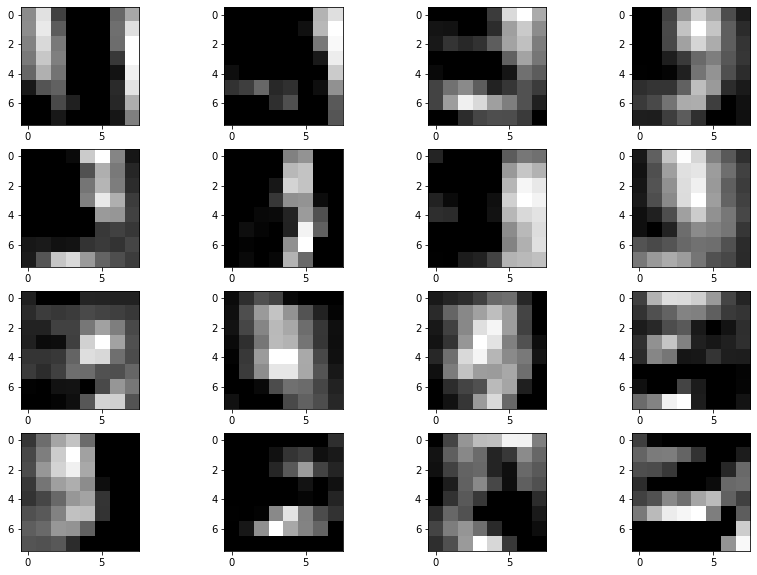

In [53]:
print(activations[2].shape)
display_activation(activations,4,4,2)

(1, 4, 4, 16)


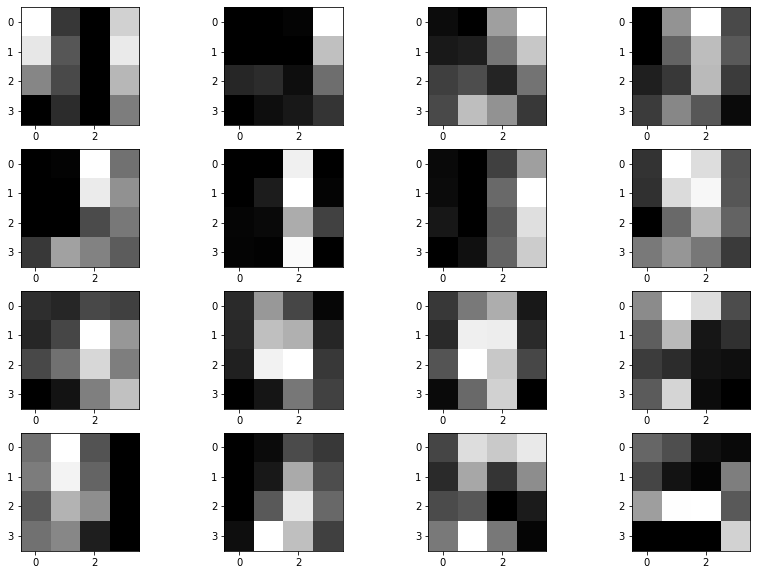

In [54]:
print(activations[3].shape)
display_activation(activations,4,4,3)

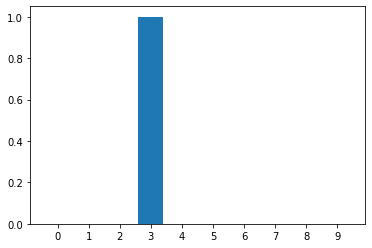

In [55]:
act_dense_3  = activations[7]
 
y = act_dense_3[0]
x = range(len(y))
plt.xticks(x)
plt.bar(x, y)
plt.show()

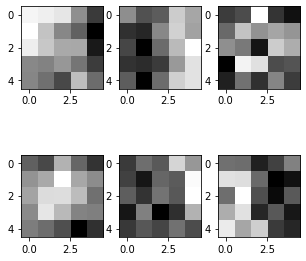

In [56]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [57]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[ 0.39  0.37  0.35  0.1  -0.15]
 [ 0.42  0.25  0.07 -0.03 -0.32]
 [ 0.37  0.26  0.17  0.17 -0.25]
 [ 0.08  0.06  0.12  0.02 -0.15]
 [ 0.07  0.   -0.11  0.23 -0.01]]

[[ 0.09 -0.11 -0.08  0.3   0.17]
 [-0.22 -0.25  0.07  0.32  0.16]
 [-0.15 -0.38 -0.02  0.24  0.47]
 [-0.21 -0.23 -0.19  0.13  0.37]
 [-0.07 -0.38 -0.02  0.31  0.37]]

[[-0.14 -0.12  0.1  -0.15 -0.2 ]
 [-0.09  0.03 -0.04 -0.01 -0.03]
 [-0.04 -0.07 -0.19  0.04 -0.  ]
 [-0.22  0.08  0.06 -0.12 -0.12]
 [-0.18 -0.08 -0.16 -0.05 -0.14]]

[[ 0.1   0.    0.41  0.12 -0.08]
 [ 0.29  0.38  0.71  0.37  0.27]
 [ 0.36  0.57  0.58  0.45  0.16]
 [ 0.26  0.61  0.44  0.23  0.22]
 [ 0.21  0.15  0.03 -0.28 -0.08]]

[[-0.15 -0.05 -0.09  0.15  0.03]
 [-0.13 -0.22 -0.06 -0.08  0.23]
 [-0.08 -0.16 -0.04 -0.09  0.24]
 [-0.22 -0.01 -0.26 -0.17  0.09]
 [-0.15 -0.09 -0.13 -0.04 -0.11]]

[[-0.03 -0.04 -0.2  -0.13  0.01]
 [ 0.21  0.2  -0.04 -0.27 -0.23]
 [-0.03  0.27 -0.1  -0.24 -0.08]
 [ 0.1   0.21 -0.19 -0.08 -0.22]
 [ 0.23  0.09  0.17 -0.14 -0.19]]

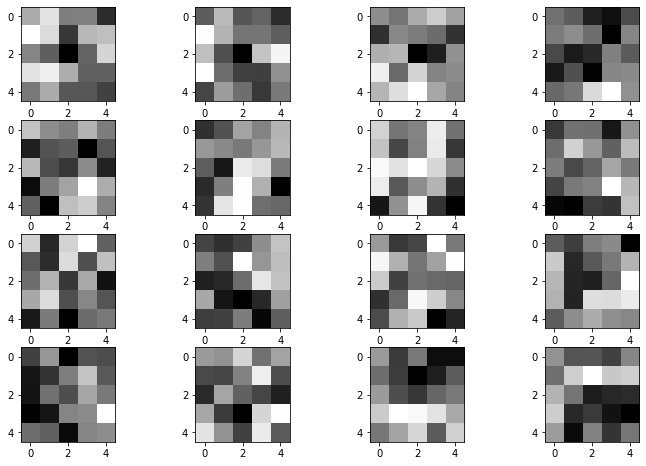

In [58]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [59]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[ 0.05  0.12  0.    0.   -0.09]
 [ 0.15  0.11 -0.08  0.07  0.08]
 [ 0.01 -0.03 -0.14 -0.03  0.1 ]
 [ 0.12  0.13  0.06 -0.03 -0.03]
 [-0.    0.05 -0.04 -0.04 -0.07]]

[[-0.04  0.05 -0.05 -0.03 -0.09]
 [ 0.12  0.04 -0.02 -0.02 -0.04]
 [ 0.06 -0.06 -0.13  0.06  0.11]
 [ 0.12 -0.02 -0.07 -0.07  0.01]
 [-0.07  0.02 -0.02 -0.08 -0.01]]

[[ 0.02 -0.    0.05  0.08  0.04]
 [-0.07  0.02  0.01 -0.01 -0.07]
 [ 0.05  0.06 -0.11 -0.08  0.03]
 [ 0.12 -0.01  0.09  0.01  0.02]
 [ 0.06  0.1   0.13  0.05  0.01]]

[[ 0.03  0.01 -0.05 -0.07 -0.01]
 [ 0.04  0.06  0.03 -0.09  0.06]
 [-0.01 -0.06 -0.04  0.05  0.01]
 [-0.06 -0.   -0.08  0.06  0.06]
 [ 0.02  0.04  0.15  0.19  0.07]]

[[ 0.09  0.04  0.02  0.08  0.02]
 [-0.08 -0.02 -0.01 -0.11 -0.02]
 [ 0.08 -0.03 -0.05  0.04 -0.07]
 [-0.1   0.02  0.06  0.16  0.07]
 [-0.01 -0.11  0.09  0.1   0.03]]

[[-0.14 -0.08  0.06  0.01  0.09]
 [ 0.04  0.02 -0.01  0.04  0.1 ]
 [-0.06 -0.18  0.19  0.16 -0.01]
 [-0.15 -0.    0.22  0.08 -0.22]
 [-0.13  0.18  0.22 -0.03 -0.04]]